## Image Enhancement Pipeline

1. **Denoising**: Non-Local Means denoising to reduce noise while preserving important details
2. **CLAHE**: Contrast Limited Adaptive Histogram Equalization for better contrast and visibility of cellular structures

__author__ : Shaimaa Abu Youssef

In [3]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [14]:
# Define the path to the data samples folder
data_folder = 'dataSamples'

# Get all image files
image_files = [f for f in os.listdir(data_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
print(f"Found {len(image_files)} images: {image_files}")

# Load and store images with their labels
images = []
labels = []

for filename in image_files:
    # Extract label from filename (remove extension)
    label = filename.split('.')[0]
    
    # Load image using OpenCV
    img_path = os.path.join(data_folder, filename)
    img = cv2.imread(img_path)
    
    # Convert from BGR to RGB for proper display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    images.append(img_rgb)
    labels.append(label)
    
print(f"Successfully loaded {len(images)} images with labels: {labels}")

Found 5 images: ['H.jpg', 'ALL.jpg', 'CLL.jpg', 'CML.jpg', 'AML.jpg']
Successfully loaded 5 images with labels: ['H', 'ALL', 'CLL', 'CML', 'AML']


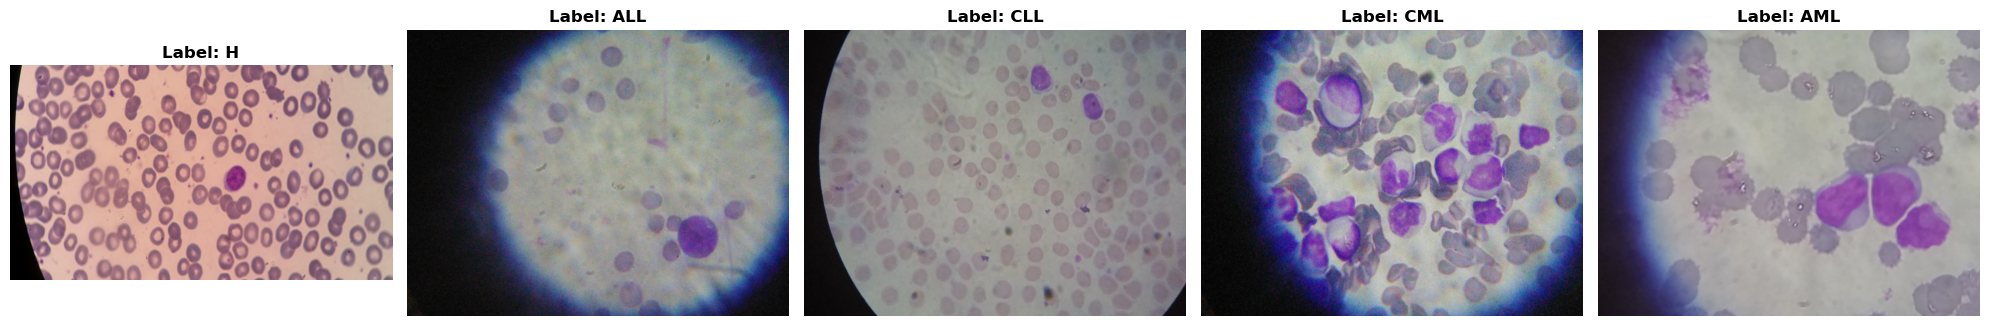

Image 1: H - Shape: (2988, 5312, 3)
Image 2: ALL - Shape: (3120, 4160, 3)
Image 3: CLL - Shape: (3120, 4160, 3)
Image 4: CML - Shape: (3120, 4160, 3)
Image 5: AML - Shape: (3120, 4160, 3)


In [15]:
# Display all images in a grid
fig, axes = plt.subplots(1, len(images), figsize=(20, 4))

for i, (img, label) in enumerate(zip(images, labels)):
    axes[i].imshow(img)
    axes[i].set_title(f'Label: {label}', fontsize=12, fontweight='bold')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Print image shapes and labels
for i, (img, label) in enumerate(zip(images, labels)):
    print(f"Image {i+1}: {label} - Shape: {img.shape}")

In [16]:
# Label descriptions for leukemia types
label_descriptions = {
    'ALL': 'Acute Lymphoblastic Leukemia',
    'AML': 'Acute Myeloid Leukemia', 
    'CLL': 'Chronic Lymphocytic Leukemia',
    'CML': 'Chronic Myeloid Leukemia',
    'H': 'Healthy (Normal)'
}

# Display label information
print("Dataset Labels and Descriptions:")
print("=" * 40)
for label in labels:
    description = label_descriptions.get(label, 'Unknown')
    print(f"{label}: {description}")

# Create a data structure for easy access
image_data = {
    'images': images,
    'labels': labels,
    'label_descriptions': label_descriptions
}

print(f"\nDataset summary: {len(images)} images across {len(set(labels))} classes")

Dataset Labels and Descriptions:
H: Healthy (Normal)
ALL: Acute Lymphoblastic Leukemia
CLL: Chronic Lymphocytic Leukemia
CML: Chronic Myeloid Leukemia
AML: Acute Myeloid Leukemia

Dataset summary: 5 images across 5 classes


In [17]:
# Denoising and CLAHE Enhancement Functions

def apply_denoising(image, h=10, templateWindowSize=7, searchWindowSize=21):
    """
    Apply Non-Local Means denoising to reduce noise in the image.
    
    Args:
        image: RGB image as numpy array
        h: filter strength. Higher h removes more noise but removes details too
        templateWindowSize: should be odd. Recommended value 7 pixels
        searchWindowSize: should be odd. Recommended value 21 pixels
    Returns:
        Denoised RGB image
    """
    # Apply Non-Local Means denoising
    denoised = cv2.fastNlMeansDenoisingColored(image, None, h, h, templateWindowSize, searchWindowSize)
    return denoised

def apply_clahe_enhancement(image):
    """
    Apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to enhance image contrast.
    
    Args:
        image: RGB image as numpy array
    Returns:
        Enhanced RGB image
    """
    # Convert RGB to LAB color space for better contrast enhancement
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    
    # Apply CLAHE to the L (lightness) channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced_l = clahe.apply(l_channel)
    
    # Merge channels back and convert to RGB
    enhanced_lab = cv2.merge((enhanced_l, a_channel, b_channel))
    enhanced_rgb = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2RGB)
    
    return enhanced_rgb

print("Denoising and CLAHE enhancement functions defined successfully!")

Denoising and CLAHE enhancement functions defined successfully!


STEP 1: DENOISING ENHANCEMENT


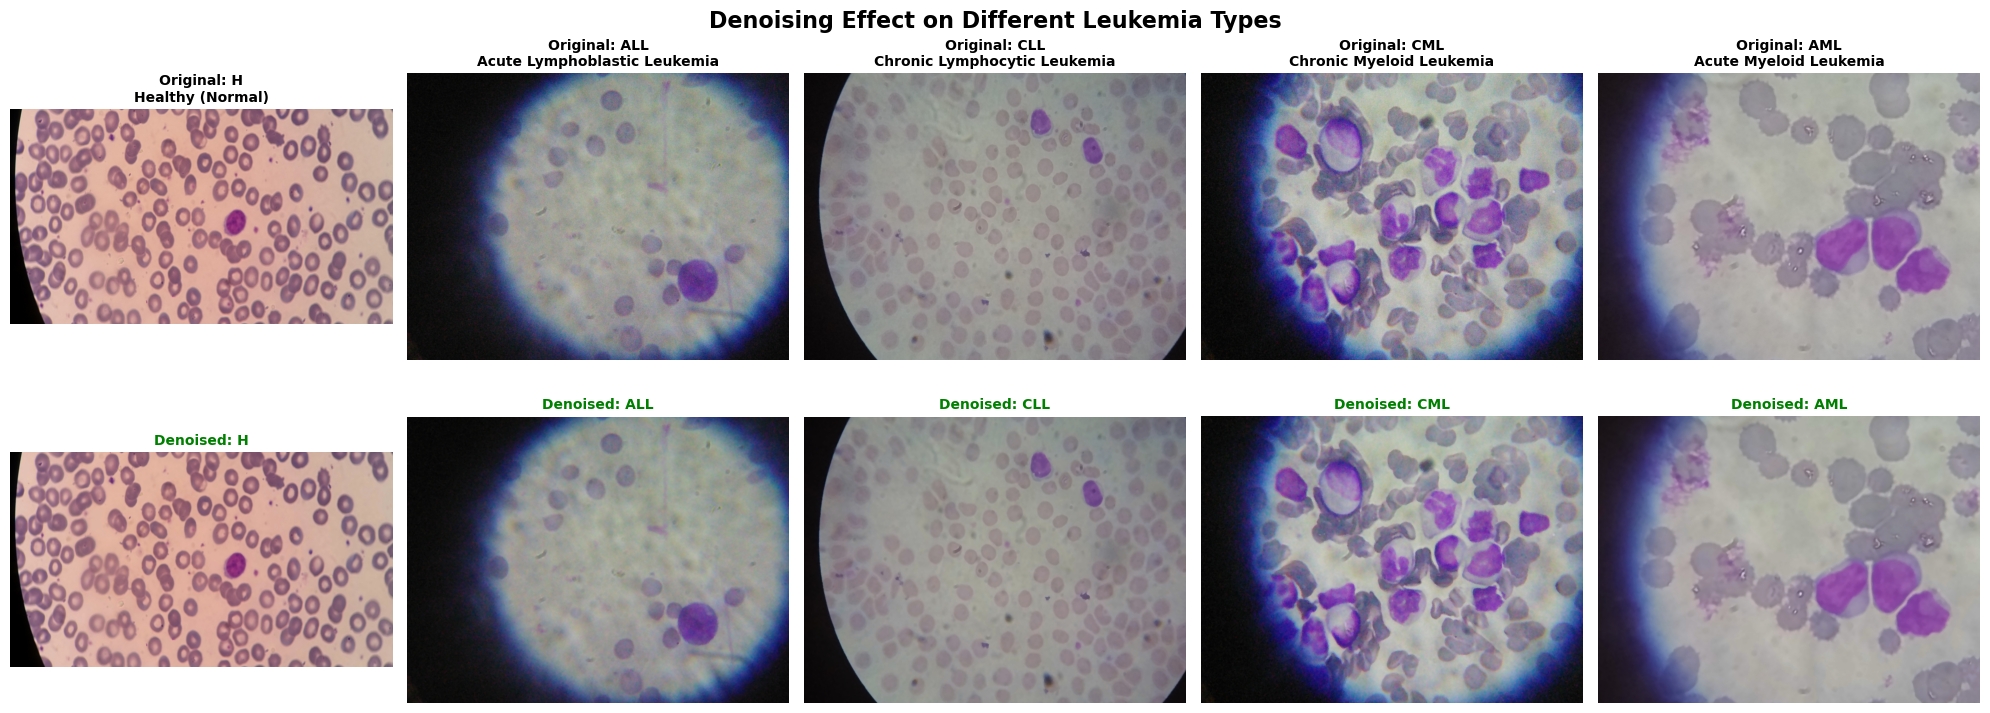


Denoising Analysis:
----------------------------------------
H (Healthy (Normal)):
  Original std: 45.88
  Denoised std: 45.69
  Noise reduction: 0.4%

ALL (Acute Lymphoblastic Leukemia):
  Original std: 59.83
  Denoised std: 59.78
  Noise reduction: 0.1%

H (Healthy (Normal)):
  Original std: 45.88
  Denoised std: 45.69
  Noise reduction: 0.4%

ALL (Acute Lymphoblastic Leukemia):
  Original std: 59.83
  Denoised std: 59.78
  Noise reduction: 0.1%

CLL (Chronic Lymphocytic Leukemia):
  Original std: 37.10
  Denoised std: 37.11
  Noise reduction: -0.0%

CML (Chronic Myeloid Leukemia):
  Original std: 61.18
  Denoised std: 61.00
  Noise reduction: 0.3%

CLL (Chronic Lymphocytic Leukemia):
  Original std: 37.10
  Denoised std: 37.11
  Noise reduction: -0.0%

CML (Chronic Myeloid Leukemia):
  Original std: 61.18
  Denoised std: 61.00
  Noise reduction: 0.3%

AML (Acute Myeloid Leukemia):
  Original std: 43.37
  Denoised std: 43.39
  Noise reduction: -0.1%

Denoising completed! Proceeding 

In [18]:
# Step 1: Apply Denoising to All Images
print("=" * 60)
print("STEP 1: DENOISING ENHANCEMENT")
print("=" * 60)

if len(images) > 0:
    # Apply denoising to all images
    denoised_images = []
    
    for img in images:
        denoised = apply_denoising(img, h=10, templateWindowSize=7, searchWindowSize=21)
        denoised_images.append(denoised)
    
    # Create side-by-side comparison for denoising
    fig, axes = plt.subplots(2, len(images), figsize=(20, 8))
    
    # Top row: Original images
    for i, (img, label) in enumerate(zip(images, labels)):
        axes[0, i].imshow(img)
        axes[0, i].set_title(f'Original: {label}\n{label_descriptions.get(label, "Unknown")}', 
                           fontsize=10, fontweight='bold')
        axes[0, i].axis('off')
    
    # Bottom row: Denoised images
    for i, (img, label) in enumerate(zip(denoised_images, labels)):
        axes[1, i].imshow(img)
        axes[1, i].set_title(f'Denoised: {label}', 
                           fontsize=10, fontweight='bold', color='green')
        axes[1, i].axis('off')
    
    # Add overall title
    fig.suptitle('Denoising Effect on Different Leukemia Types', 
                fontsize=16, fontweight='bold', y=0.95)
    
    plt.tight_layout()
    plt.show()
    
    # Print analysis of denoising effects
    print("\nDenoising Analysis:")
    print("-" * 40)
    
    for i, (original, denoised, label) in enumerate(zip(images, denoised_images, labels)):
        # Calculate noise reduction metrics
        orig_std = np.std(original)
        denoised_std = np.std(denoised)
        noise_reduction = ((orig_std - denoised_std) / orig_std) * 100
        
        print(f"{label} ({label_descriptions.get(label, 'Unknown')}):")
        print(f"  Original std: {orig_std:.2f}")
        print(f"  Denoised std: {denoised_std:.2f}")
        print(f"  Noise reduction: {noise_reduction:.1f}%")
        print()
    
    print("Denoising completed! Proceeding to CLAHE enhancement...")
    
else:
    print("No images loaded. Please run the image loading cells first.")

STEP 2: CLAHE ENHANCEMENT AFTER DENOISING


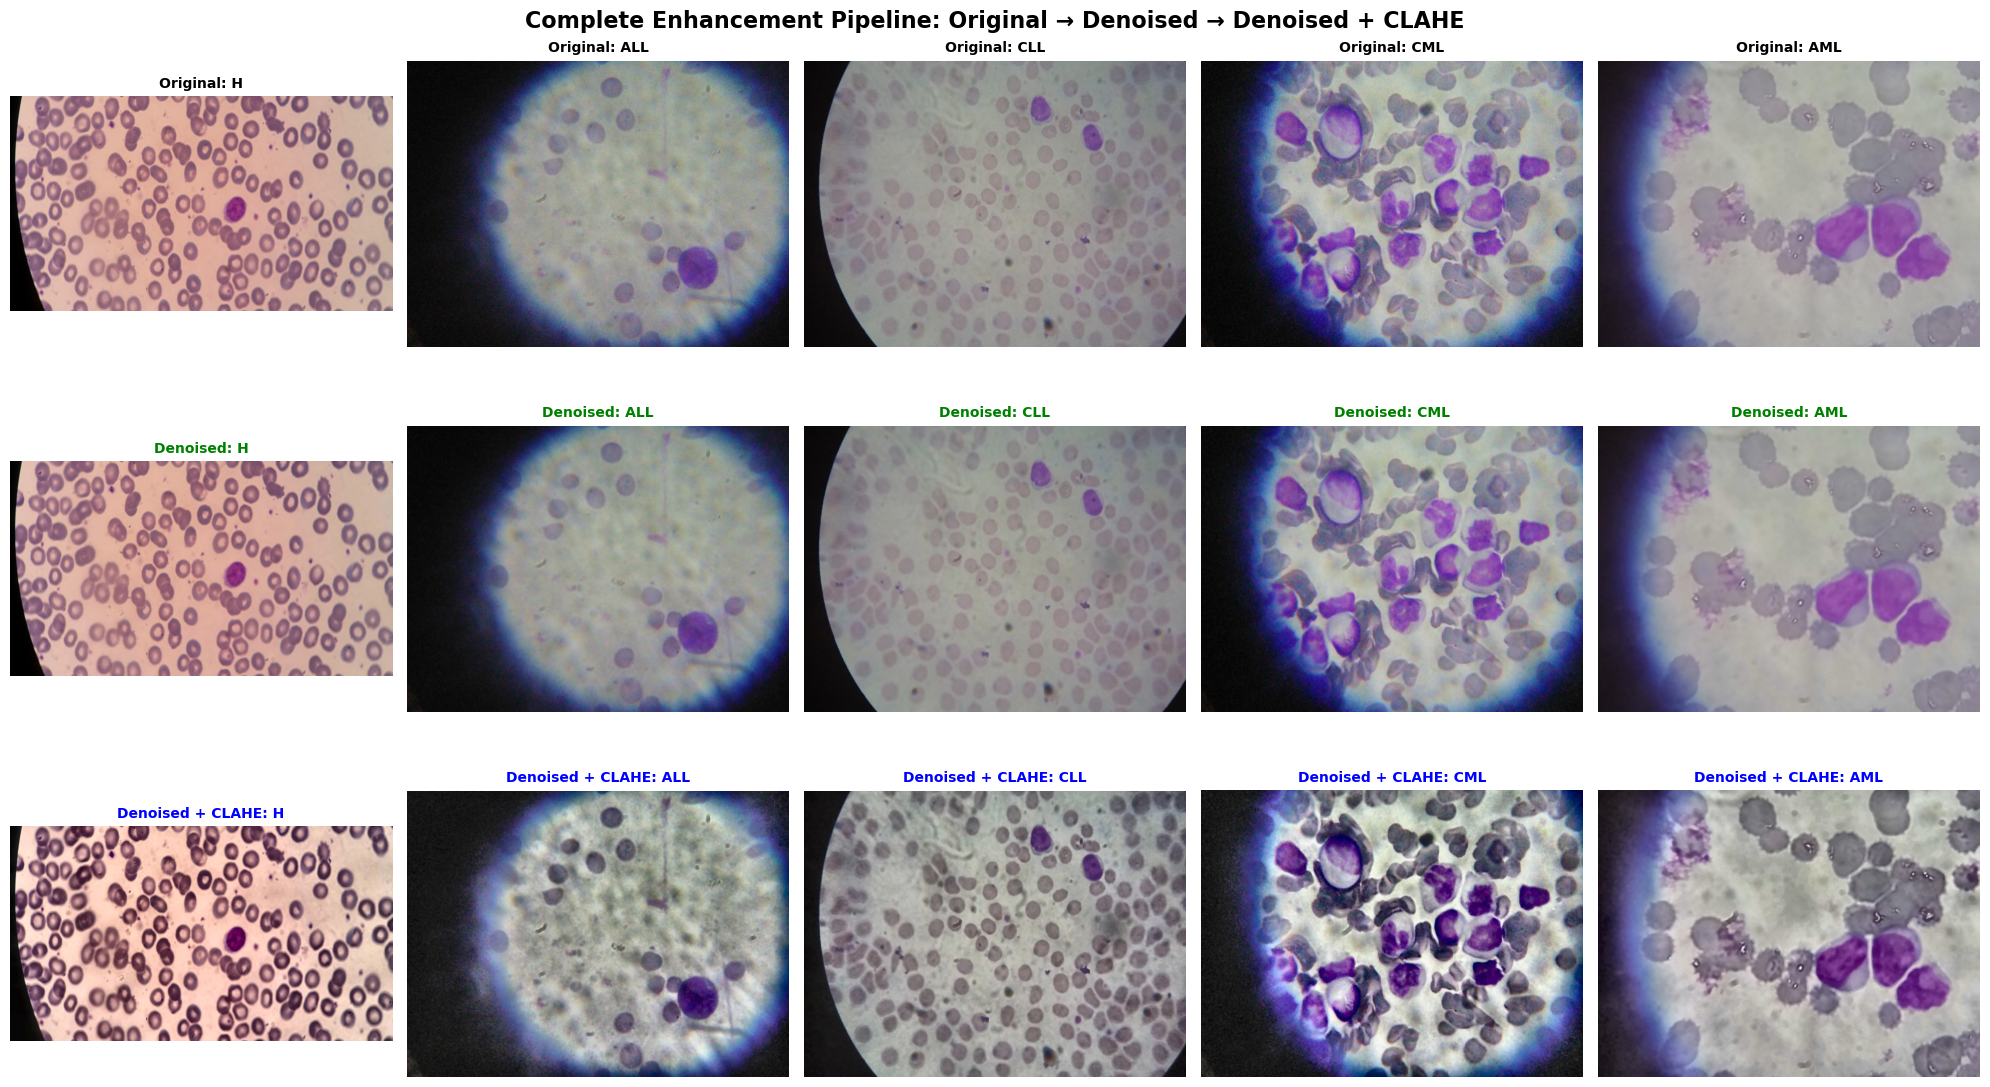


Complete Enhancement Analysis:
--------------------------------------------------
H (Healthy (Normal)):
  Mean intensity: 154.0 → 153.7 → 155.9
  Contrast (std): 45.9 → 45.7 → 66.5
  Final improvement: +44.9% contrast

H (Healthy (Normal)):
  Mean intensity: 154.0 → 153.7 → 155.9
  Contrast (std): 45.9 → 45.7 → 66.5
  Final improvement: +44.9% contrast

ALL (Acute Lymphoblastic Leukemia):
  Mean intensity: 104.6 → 104.2 → 115.2
  Contrast (std): 59.8 → 59.8 → 61.5
  Final improvement: +2.7% contrast

ALL (Acute Lymphoblastic Leukemia):
  Mean intensity: 104.6 → 104.2 → 115.2
  Contrast (std): 59.8 → 59.8 → 61.5
  Final improvement: +2.7% contrast

CLL (Chronic Lymphocytic Leukemia):
  Mean intensity: 131.0 → 130.7 → 134.5
  Contrast (std): 37.1 → 37.1 → 43.8
  Final improvement: +18.1% contrast

CLL (Chronic Lymphocytic Leukemia):
  Mean intensity: 131.0 → 130.7 → 134.5
  Contrast (std): 37.1 → 37.1 → 43.8
  Final improvement: +18.1% contrast

CML (Chronic Myeloid Leukemia):
  Mean in

In [21]:
# Step 2: Apply CLAHE Enhancement to Denoised Images
print("=" * 60)
print("STEP 2: CLAHE ENHANCEMENT AFTER DENOISING")
print("=" * 60)

if 'denoised_images' in locals() and len(denoised_images) > 0:
    # Apply CLAHE to denoised images
    final_enhanced_images = []
    
    for img in denoised_images:
        clahe_enhanced = apply_clahe_enhancement(img)
        final_enhanced_images.append(clahe_enhanced)
    
    # Create three-row comparison: Original -> Denoised -> Denoised+CLAHE
    fig, axes = plt.subplots(3, len(images), figsize=(20, 12))
    
    # Top row: Original images
    for i, (img, label) in enumerate(zip(images, labels)):
        axes[0, i].imshow(img)
        axes[0, i].set_title(f'Original: {label}', fontsize=10, fontweight='bold')
        axes[0, i].axis('off')
    
    # Middle row: Denoised images
    for i, (img, label) in enumerate(zip(denoised_images, labels)):
        axes[1, i].imshow(img)
        axes[1, i].set_title(f'Denoised: {label}', fontsize=10, fontweight='bold', color='green')
        axes[1, i].axis('off')
    
    # Bottom row: Denoised + CLAHE enhanced images
    for i, (img, label) in enumerate(zip(final_enhanced_images, labels)):
        axes[2, i].imshow(img)
        axes[2, i].set_title(f'Denoised + CLAHE: {label}', fontsize=10, fontweight='bold', color='blue')
        axes[2, i].axis('off')
    
    # Add overall title
    fig.suptitle('Complete Enhancement Pipeline: Original → Denoised → Denoised + CLAHE', 
                fontsize=16, fontweight='bold', y=0.95)
    
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive analysis
    print("\nComplete Enhancement Analysis:")
    print("-" * 50)
    
    for i, (original, denoised, enhanced, label) in enumerate(zip(images, denoised_images, final_enhanced_images, labels)):
        # Calculate statistics for all stages
        orig_mean = np.mean(original)
        denoised_mean = np.mean(denoised)
        enhanced_mean = np.mean(enhanced)
        
        orig_std = np.std(original)
        denoised_std = np.std(denoised)
        enhanced_std = np.std(enhanced)
        
        print(f"{label} ({label_descriptions.get(label, 'Unknown')}):")
        print(f"  Mean intensity: {orig_mean:.1f} → {denoised_mean:.1f} → {enhanced_mean:.1f}")
        print(f"  Contrast (std): {orig_std:.1f} → {denoised_std:.1f} → {enhanced_std:.1f}")
        print(f"  Final improvement: {((enhanced_std - orig_std) / orig_std * 100):+.1f}% contrast")
        print()
    
    # Store the final enhanced images
    enhanced_data = {
        'original_images': images,
        'denoised_images': denoised_images,
        'final_enhanced_images': final_enhanced_images,
        'labels': labels,
        'label_descriptions': label_descriptions,
        'enhancement_pipeline': ['Denoising', 'CLAHE']
    }

FINAL COMPARISON: ORIGINAL vs ENHANCED


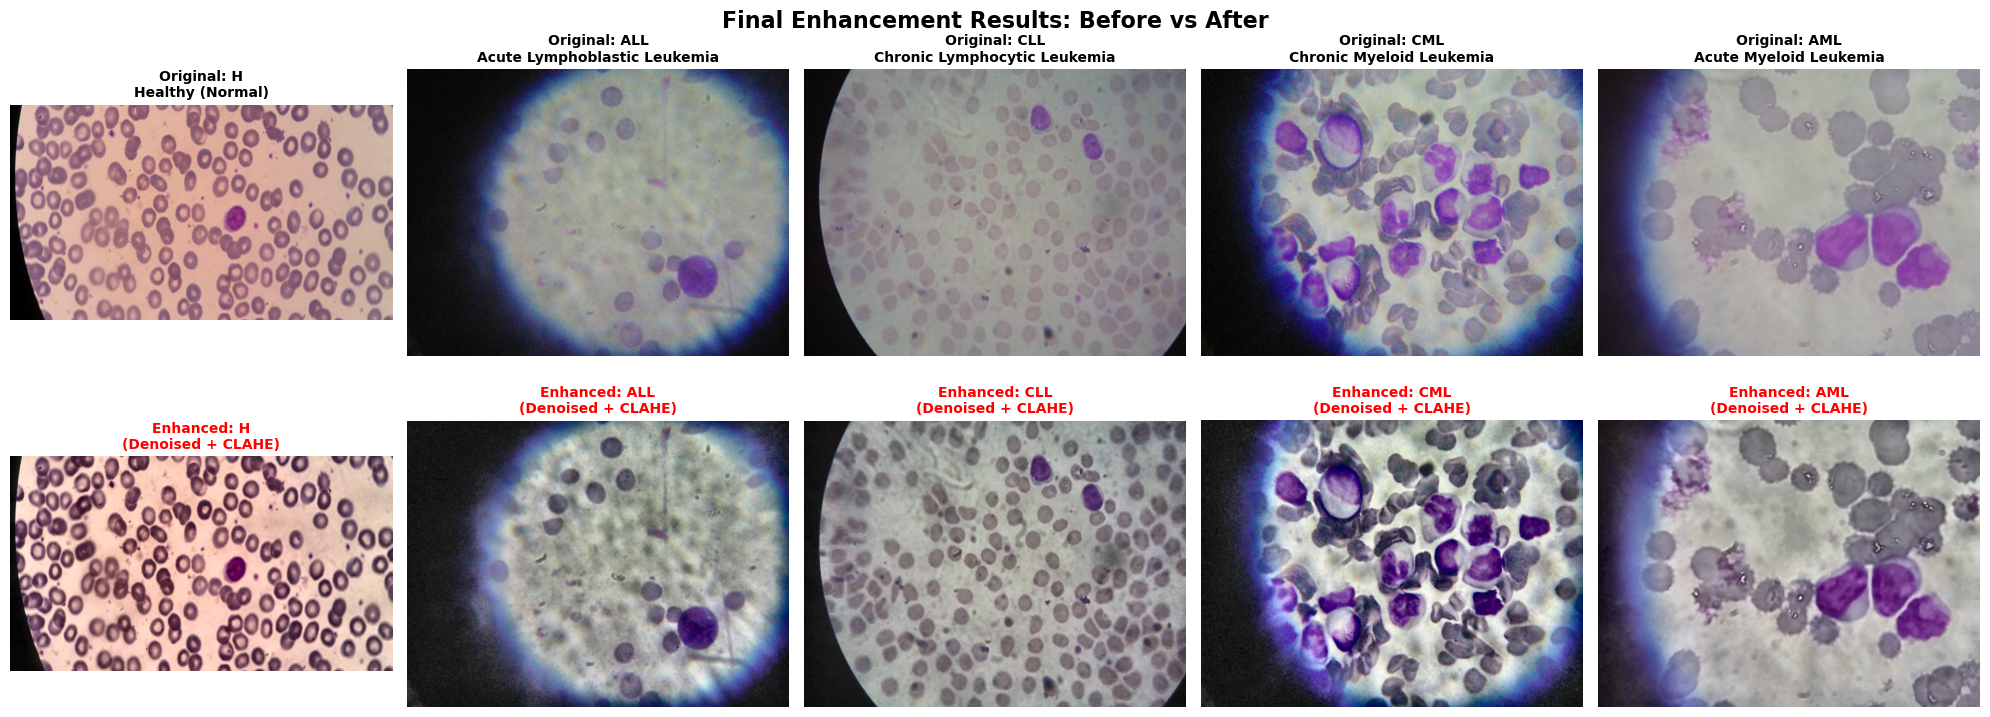


Enhancement Summary:
------------------------------
✓ Applied denoising using Non-Local Means
✓ Applied CLAHE contrast enhancement
✓ Processed 5 images across 5 classes
✓ Images ready for deep learning model training


In [20]:
# Final Comparison: Original vs Fully Enhanced
print("=" * 60)
print("FINAL COMPARISON: ORIGINAL vs ENHANCED")
print("=" * 60)

if 'final_enhanced_images' in locals() and len(final_enhanced_images) > 0:
    # Create final before/after comparison
    fig, axes = plt.subplots(2, len(images), figsize=(20, 8))
    
    # Top row: Original images
    for i, (img, label) in enumerate(zip(images, labels)):
        axes[0, i].imshow(img)
        axes[0, i].set_title(f'Original: {label}\n{label_descriptions.get(label, "Unknown")}', 
                           fontsize=10, fontweight='bold')
        axes[0, i].axis('off')
    
    # Bottom row: Final enhanced images
    for i, (img, label) in enumerate(zip(final_enhanced_images, labels)):
        axes[1, i].imshow(img)
        axes[1, i].set_title(f'Enhanced: {label}\n(Denoised + CLAHE)', 
                           fontsize=10, fontweight='bold', color='red')
        axes[1, i].axis('off')
    
    # Add overall title
    fig.suptitle('Final Enhancement Results: Before vs After', 
                fontsize=16, fontweight='bold', y=0.95)
    
    plt.tight_layout()
    plt.show()
    
    print("\nEnhancement Summary:")
    print("-" * 30)
    print(f"✓ Applied denoising using Non-Local Means")
    print(f"✓ Applied CLAHE contrast enhancement")
    print(f"✓ Processed {len(final_enhanced_images)} images across {len(set(labels))} classes")
    print(f"✓ Images ready for deep learning model training")
    
else:
    print("No enhanced images found. Please run the enhancement pipeline first.")